In [6]:
from id_identificator import Id_identicator
import requests
from requests.auth import HTTPDigestAuth
import numpy as np
import cv2
from PIL import Image
import json
import matplotlib.pyplot as plt

prueba=Id_identicator(path_yolo="../MiCasitaCIDetection/runs/obb/yolo11_obb_custom2/weights/best.pt",device="cpu")

[INFO] 2025-07-04 16:44:00,411 [RapidOCR] base.py:24: Using engine_name: onnxruntime
[INFO] 2025-07-04 16:44:00,412 [RapidOCR] main.py:55: Using C:\Users\USER\AppData\Roaming\cnstd\1.2\ppocr\ch_PP-OCRv5_det\ch_PP-OCRv5_det_infer.onnx
[INFO] 2025-07-04 16:44:00,499 [RapidOCR] base.py:24: Using engine_name: onnxruntime
[INFO] 2025-07-04 16:44:00,500 [RapidOCR] main.py:55: Using C:\Users\USER\AppData\Roaming\cnstd\1.2\ppocr\ch_PP-OCRv5_det\ch_PP-OCRv5_det_infer.onnx


In [7]:

# Parámetros del DVR
ip_dvr = "192.168.0.249"
usuario = "admin"
contrasena = "asd12345"
canal = 5  # Por ejemplo: canal 1 -> 101

# URL del snapshot
#url = f"http://{ip_dvr}/ISAPI/Streaming/channels/{canal}01/picture?videoResolutionWidth=1920&videoResolutionHeight=1080"
url = f"http://{ip_dvr}/ISAPI/Streaming/channels/{canal}01/picture"
try:
    response = requests.get(url, auth=HTTPDigestAuth(usuario, contrasena), timeout=5)

    if response.status_code == 200:
        # Convertir bytes a imagen con OpenCV
        img_array = np.frombuffer(response.content, dtype=np.uint8)
        imgen_read = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        imgen_read = cv2.cvtColor(imgen_read,cv2.COLOR_BGR2RGB)
        


        if imgen_read is not None:
            print("imagen guardada")
            print(imgen_read.shape)
        else:
            print("❌ No se pudo decodificar la imagen.")
    else:
        print(f"❌ Error al obtener imagen: {response.status_code}")
except Exception as e:
    print(f"❌ Excepción: {e}")



imagen guardada
(480, 704, 3)


In [8]:
prueba.run(img=imgen_read,conf=0.7)
print(prueba.recogntion())


0: 448x640 None45.8ms
Speed: 2.1ms preprocess, 45.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
{'N_ID': '1003145271', 'Apellidos': '', 'Nombres': ''}


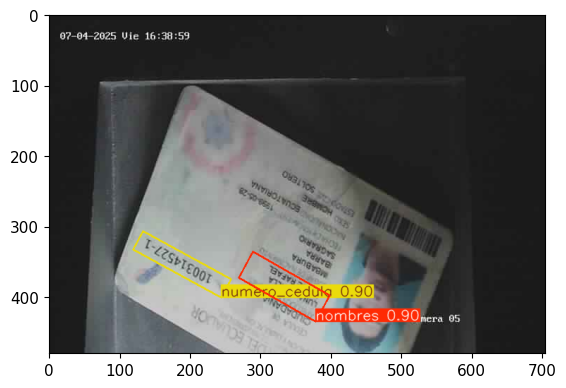

In [9]:
%matplotlib inline
plt.imshow(prueba.img_array)
plt.show()